Epoch [1/50], Loss: 0.7590
Epoch [2/50], Loss: 0.8341
Epoch [3/50], Loss: 0.6298
Epoch [4/50], Loss: 0.6894
Epoch [5/50], Loss: 0.3867
Epoch [6/50], Loss: 0.4200
Epoch [7/50], Loss: 0.5711
Epoch [8/50], Loss: 0.6338
Epoch [9/50], Loss: 0.7802
Epoch [10/50], Loss: 0.5680
Epoch [11/50], Loss: 0.5344
Epoch [12/50], Loss: 0.2887
Epoch [13/50], Loss: 0.3439
Epoch [14/50], Loss: 0.5792
Epoch [15/50], Loss: 0.2718
Epoch [16/50], Loss: 0.5512
Epoch [17/50], Loss: 0.1460
Epoch [18/50], Loss: 0.4400
Epoch [19/50], Loss: 0.5083
Epoch [20/50], Loss: 0.2341
Epoch [21/50], Loss: 0.3189
Epoch [22/50], Loss: 0.2626
Epoch [23/50], Loss: 0.1365
Epoch [24/50], Loss: 0.6503
Epoch [25/50], Loss: 0.2987
Epoch [26/50], Loss: 0.3682
Epoch [27/50], Loss: 0.1653
Epoch [28/50], Loss: 0.1218
Epoch [29/50], Loss: 0.8256
Epoch [30/50], Loss: 0.2774
Epoch [31/50], Loss: 0.1303
Epoch [32/50], Loss: 0.1495
Epoch [33/50], Loss: 0.5791
Epoch [34/50], Loss: 0.1888
Epoch [35/50], Loss: 0.1726
Epoch [36/50], Loss: 0.2941
E

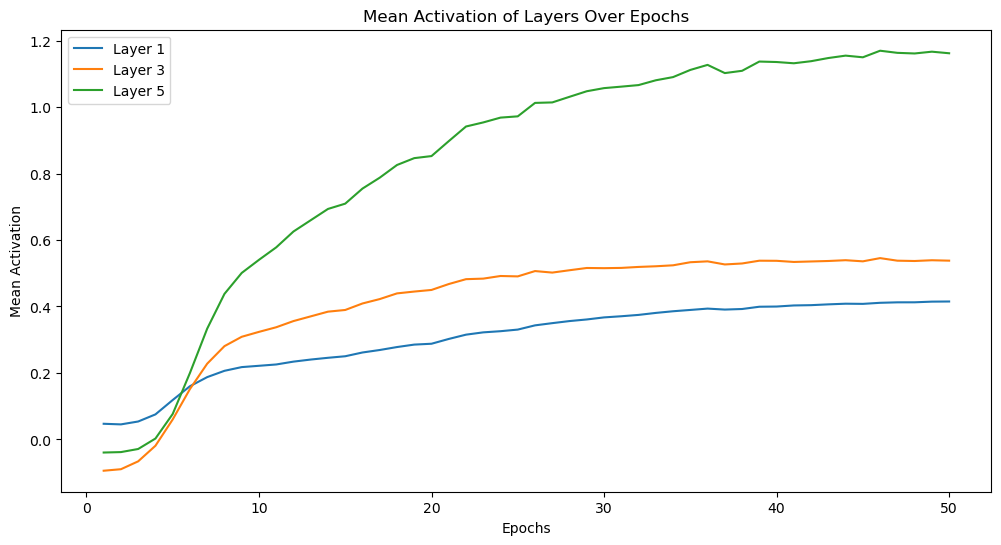

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(8, 3)
        self.layer2 = nn.ReLU()
        self.layer3 = nn.Linear(3, 5)
        self.layer4 = nn.ReLU()
        self.layer5 = nn.Linear(5, 5)
        self.layer6 = nn.ReLU()
        self.output_layer = nn.Linear(5, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        activations = {}
        x = self.layer1(x)
        activations["Layer 1"] = x.detach().cpu().numpy()
        x = self.layer2(x)
        x = self.layer3(x)
        activations["Layer 3"] = x.detach().cpu().numpy()
        x = self.layer4(x)
        x = self.layer5(x)
        activations["Layer 5"] = x.detach().cpu().numpy()
        x = self.layer6(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x, activations

# Generate synthetic dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=8, n_classes=2, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Prepare DataLoader
dataset = TensorDataset(X, y)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Instantiate the model, loss, and optimizer
model = NeuralNetwork()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Custom function to track and store activations
class ActivationTracker:
    def __init__(self):
        self.activations = { "Layer 1": [], "Layer 3": [], "Layer 5": [] }

    def update(self, epoch_activations):
        for layer, values in epoch_activations.items():
            mean_activation = np.mean(values)
            self.activations[layer].append(mean_activation)

    def plot(self):
        epochs = range(1, len(next(iter(self.activations.values()))) + 1)
        plt.figure(figsize=(12, 6))
        for layer, values in self.activations.items():
            plt.plot(epochs, values, label=layer)
        plt.xlabel("Epochs")
        plt.ylabel("Mean Activation")
        plt.title("Mean Activation of Layers Over Epochs")
        plt.legend()
        plt.show()

# Training loop
tracker = ActivationTracker()
num_epochs = 50

for epoch in range(num_epochs):
    epoch_activations = { "Layer 1": [], "Layer 3": [], "Layer 5": [] }
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        output, activations = model(batch_X)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()
        
        # Track activations
        for layer, values in activations.items():
            epoch_activations[layer].extend(values)

    # Update tracker with mean activations of the epoch
    tracker.update(epoch_activations)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Plot the activations after training
tracker.plot()